# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

titanic_df = pd.read_csv('./sample_data/train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. 분석의 목적과 변수 확인

## 2. 데이터 전체적으로 살펴보기

## 3. 데이터의 개별 속성 파악하기

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()

#승무원 생존 비율
## 가설


*   선상 구조가 익숙한 승무원의 생존률이 승객보다 높을 것이다.
*   약자인 여성 생존률이 더 높을 것이다.

##분석


*   남성 승무원보다 여성 승객의 생존률이 높다.
*   승무원 여부를 기준으로 비교했을 때 승무원의 생존률이 승객보다 높다.



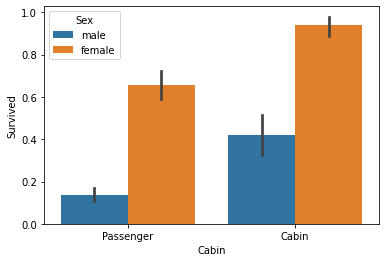

In [7]:
titanic_df = pd.read_csv('./sample_data/train.csv')

fig, ax = plt.subplots()

titanic_df.loc[titanic_df['Cabin'].isna() == False, 'Cabin'] = 1
titanic_df.loc[titanic_df['Cabin'].isna() == True, 'Cabin'] = 0

g = sns.barplot(data=titanic_df, x="Cabin", y="Survived", hue="Sex")
g.set_xticklabels(["Passenger", "Cabin"])

plt.show()


#배드민턴 국가별 참가율
##가설


1.   중국이 제일 많을 것이다

##분석


1.   중국이 압도적이다.
2.   일본이 2번째다.




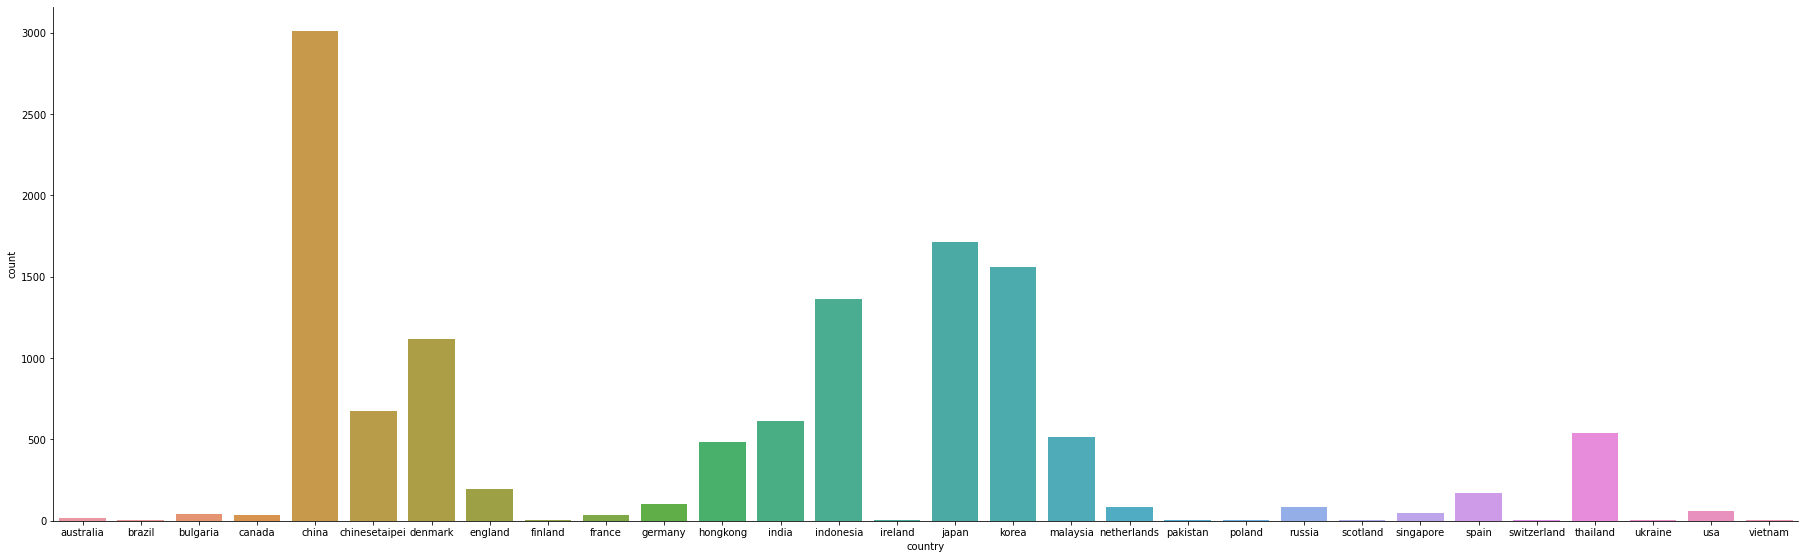

In [9]:
badminton_df = pd.read_csv('./sample_data/bwf-ss-gamedata-2015-2017-new.csv')
badminton_df['home'], badminton_df['away'] = badminton_df['Match'].str.split('-').str[0], badminton_df['Match'].str.split('-').str[1]

dashboard = pd.DataFrame()
dashboard['country'] = pd.Series(np.unique(np.concatenate((badminton_df.home.unique(), badminton_df.away.unique()), axis=None)))
dashboard['count'] = 0

home_df = badminton_df[badminton_df['Round'] != '1'].groupby('home').size().sort_values(ascending=False).reset_index(name='count')
home_df.columns = ["country", "count"]

away_df = badminton_df[badminton_df['Round'] != '1'].groupby('away').size().sort_values(ascending=False).reset_index(name='count')
away_df.columns = ["country", "count"]

dashboard = pd.concat([home_df, away_df]).groupby(['country']).sum().reset_index()

g = sns.catplot(data=dashboard, kind="bar", x='country', y='count')
g.fig.set_size_inches(30, 8)

#배드민턴 결승전 국가별 진출률
##가설


1.   한국이 제일 많을 것이다....

##분석


1.   중국이 압도적이다.
2.   참가율은 일본이 2번째이지만 결승전 진출은 한국이 2번째다.

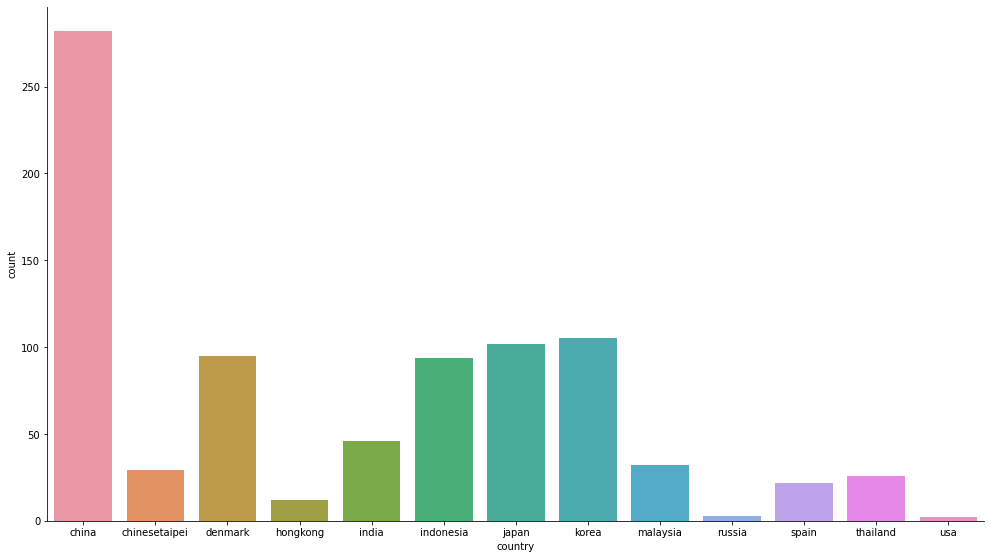

In [10]:
badminton_df = pd.read_csv('./sample_data/bwf-ss-gamedata-2015-2017-new.csv')
badminton_df['home'], badminton_df['away'] = badminton_df['Match'].str.split('-').str[0], badminton_df['Match'].str.split('-').str[1]

dashboard = pd.DataFrame()
dashboard['country'] = pd.Series(np.unique(np.concatenate((badminton_df.home.unique(), badminton_df.away.unique()), axis=None)))
dashboard['count'] = 0

home_df = badminton_df[badminton_df['Round'] == 'F'].groupby('home').size().sort_values(ascending=False).reset_index(name='count')
home_df.columns = ["country", "count"]

away_df = badminton_df[badminton_df['Round'] == 'F'].groupby('away').size().sort_values(ascending=False).reset_index(name='count')
away_df.columns = ["country", "count"]

dashboard = pd.concat([home_df, away_df]).groupby(['country']).sum().reset_index()

g = sns.catplot(data=dashboard, kind="bar", x='country', y='count')
g.fig.set_size_inches(15, 8)

#연도별 듀스 발생률
##가설


1.   최근 대회일수록 듀스가 많이 발생했을 것이다.

##분석


1.   해가 거듭할수록 늘어나고있다.



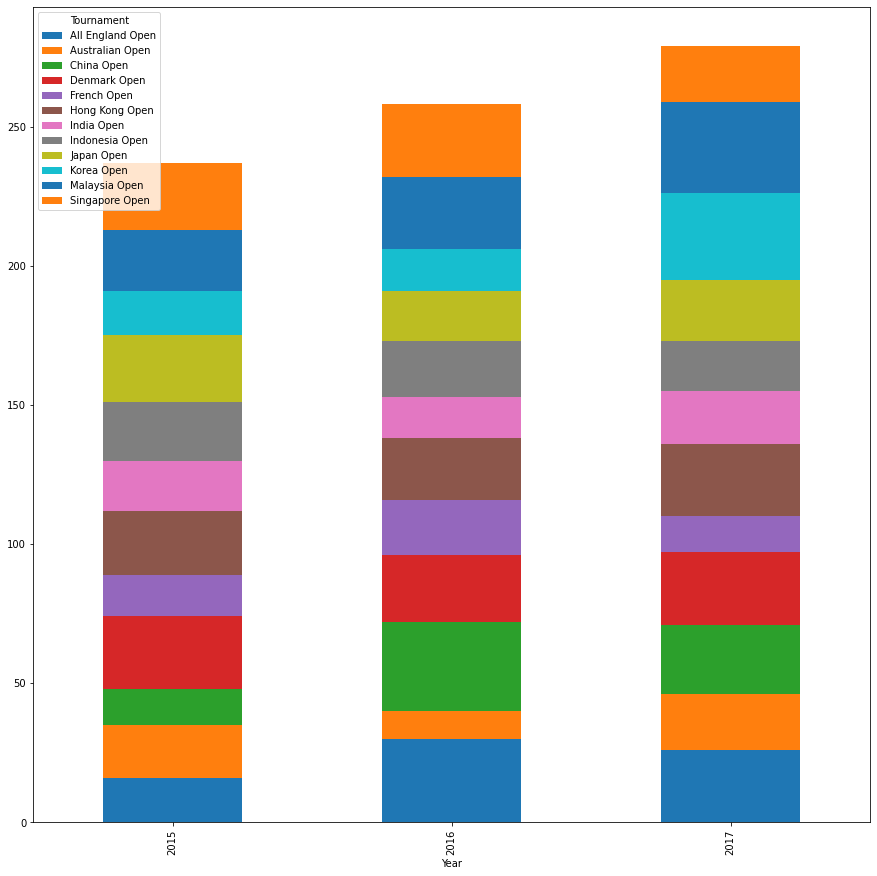

In [33]:
badminton_df = pd.read_csv('./sample_data/bwf-ss-gamedata-2015-2017-new.csv')
badminton_df['LastScore'] = badminton_df['Scores'].apply(lambda x: x.split(';')[-1])
badminton_df[badminton_df['LastScore'].str.contains('21') == False].groupby(['Year', 'Tournament']).size().unstack().plot(kind='bar', stacked=True, figsize=(15, 15))

#리그별와 라운드 별 점수 격차 분포
##가설


1.   라운드가 낮을수록 점수 격차가 큰 경기가 많은 것이다.
2.   혼합 복식이 다른 조합(남자 복식, 여자 복식, 남자 단식, 여자 단식)보다 점수 차가 적을 것이다.

##분석


1.   모든 분야(XD, WD, MD, MS, WS)에서 1라운드에 점수 격차가 크다.
2.   남자 복식이 가장 점수 격차가 적다.



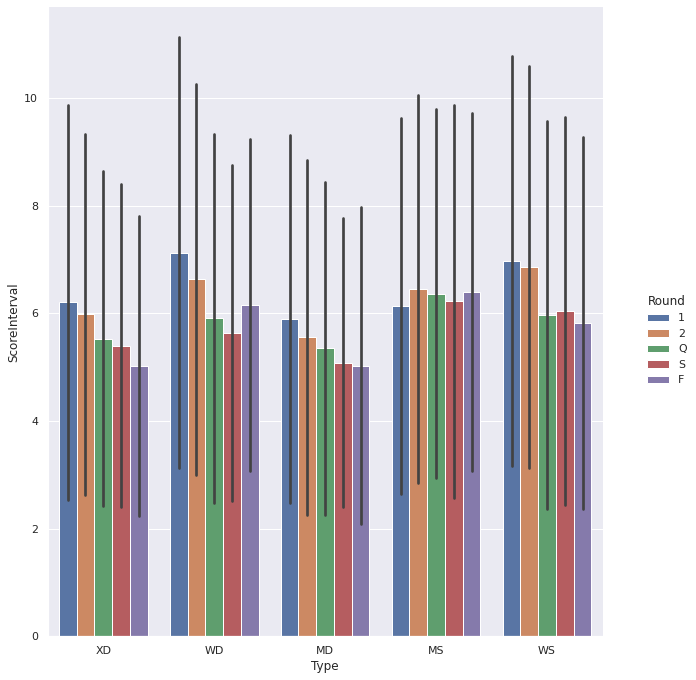

In [123]:
badminton_df = pd.read_csv('./sample_data/bwf-ss-gamedata-2015-2017-new.csv')
badminton_df['ScoreInterval'] = badminton_df['Scores'].apply(lambda x: abs(int(x.split(';')[-1].split('-')[0]) - int(x.split(';')[-1].split('-')[1])))
g = sns.catplot(
    data=badminton_df, kind="bar",
    x="Type", y="ScoreInterval", hue="Round", ci="sd"
)

g.fig.set_size_inches((10, 10))